In [14]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns

import tensorflow as tf
from tensorflow import keras

In [15]:
# READ FROM CSV AND CREATE A DATA FRAME

import pandas as pd

df = pd.read_csv('../datasets/diabetes_prediction_dataset.csv')


# df_male = df.loc[df['gender'] == 'Male']    # GET ONLY THE MALE DATA(REASON: APATOTO FEMALE DATA THAK)

# df_male = df_male.drop("gender",axis="columns")     # REMOVE GENDER COLUMN

df['gender'].replace('Male', 1, inplace=True)
df['gender'].replace('Female', 0, inplace=True)
df = df.loc[df['gender'] != 'Other']

df = df.drop("smoking_history",axis="columns")     # REMOVE SMOKING HISTORY COLUMN(REASON: DONT KNOW HOW SMOKING AFFECTS DIABETES)
df

KeyError: 'gender'

In [ ]:
# SPLIT DF_MALE INTO X & Y
# X = INDEPENDENT VARIABLES
# Y = EPENDENT VARIABLES
y = df['diabetes'].copy()
X = df.drop('diabetes', axis="columns")

y.value_counts()

diabetes
0    91482
1     8500
Name: count, dtype: int64

In [ ]:
# HANDLE ADTA IMBALANCE - INCREASE/DECREASE ROWS WITH CLASS VALUES(0/1) IF ONE IS LOWER IN NUMBER
# FOR BETTER TRAINING

from imblearn.over_sampling import SMOTE

X_balanced, y_balanced = SMOTE().fit_resample(X, y)
y_balanced.value_counts()

diabetes
0    91482
1    91482
Name: count, dtype: int64

In [ ]:
# TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, train_size=0.8, random_state=42)

# Scale X with a standard scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [ ]:
y_train

108677    1
124261    1
73113     0
14222     0
98999     0
         ..
119879    1
103694    1
131932    1
146867    1
121958    1
Name: diabetes, Length: 146371, dtype: int64

In [ ]:
# TRAIN THE MODEL WITH SVM

from sklearn.svm import SVC # "Support vector classifier"  
model = SVC(C=1000, gamma=0.1, kernel='rbf', random_state=42)  
model.fit(X_train, y_train)  


SVC(C=1000, gamma=0.1, random_state=42)

In [ ]:
# HYPER PARAMETER TUNING

# from sklearn.model_selection import GridSearchCV
  
# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']} 
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# # fitting the model for grid search
# grid.fit(X_train, y_train)

# # print best parameter after tuning
# print(grid.best_params_)
  
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

In [ ]:
# PREDICT RESULTS

y_pred = model.predict(X_test) 
# train_pred = model.predict(X_train)

pred = model.score(X_test, y_test)
print(f"Accuracy : {pred * 100}%")

Accuracy : 92.348263329052%


Text(95.72222222222221, 0.5, 'Truth')

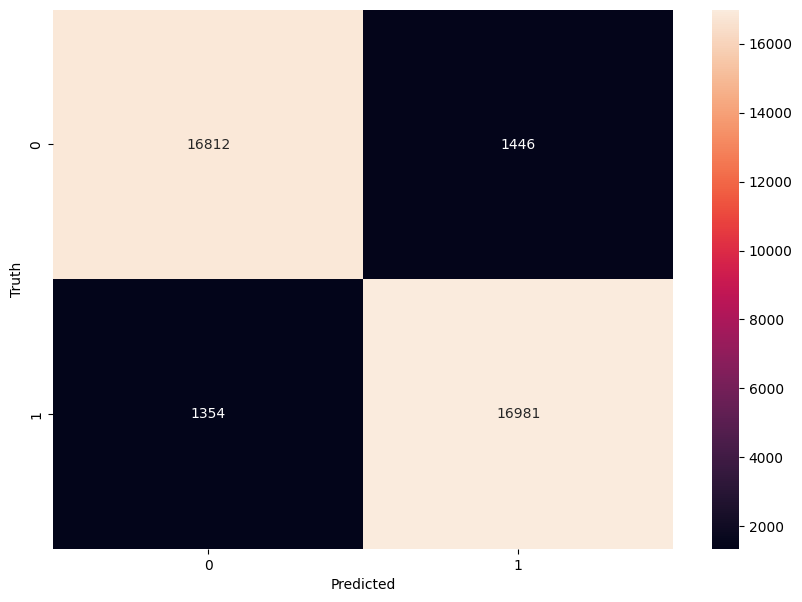

In [ ]:
# CONFUSION MATRIX

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
# MANUAL CHECKING BY PUTTING ROW VALUES

row = 800
y_pred = model.predict(X_test.iloc[[row]])
res = y_pred[0]
print('prediction => ', res)
print('real => ', y_test.iloc[[row]])

prediction =>  1
real =>  141645    1
Name: diabetes, dtype: int64


In [2]:
# SAVING THE MODEL USING PICKLE PACKAGE

import pickle

# save the iris classification model as a pickle file
model_pkl_file = "diabetes-model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

NameError: name 'model' is not defined

In [1]:
# LOAD AND USE THE SAVED MODEL USING PICKLE PACKAGE
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

# evaluate model 
y_pred = model.predict(X_test)

# check results
pred = model.score(y_test, y_pred)
print(f"Accuracy : {pred * 100}%")

NameError: name 'model_pkl_file' is not defined